# poplocavanje


Oblast $G$ $x\over y$

In [4]:
#!pip install shapely descartes

In [2]:
%matplotlib inline
from shapely.geometry import Point


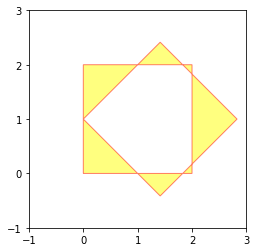

In [3]:
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import affine_transform
from descartes.patch import PolygonPatch
import numpy as np
from math import sin, cos, pi

# afine transformacije predstavljamo homogenim koordinatama

def transl(tx,ty):
    return np.array([
	[ 1,  0,  tx],
	[ 0,  1,  ty],
	[ 0,  0,  1] 
    ])

def rot0(fi):
    return np.array([
	[ cos(fi),  sin(fi),  0],
	[-sin(fi),  cos(fi),  0],
	[       0,        0,  1] 
    ])

# operator @ je mnozenje matrica
def rot(fi, cx, cy):
    return transl(cx, cy) @  rot0(fi) @ transl(-cx, -cy)


def affine_h(geom, m):
    return affine_transform(geom, [m[0,0],m[0,1],m[1,0],m[1,1],m[0,2],m[1,2]])

ax = plt.axes()

p1 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])

p2 = affine_h(p1, transl(0,1) @ rot(pi/4,0,0))


patch = PolygonPatch(p1.symmetric_difference(p2), facecolor='#ffff00', edgecolor='#ff0000', alpha=0.5, zorder=2)
ax.add_patch(patch)

#patch = PolygonPatch(p2, facecolor='#ff3333', edgecolor='#6699cc', alpha=0.5, zorder=2)
#ax.add_patch(patch)

ax.set_xlim(-1,3)
ax.set_xticks(range(-1,4))
ax.set_ylim(-1,3)
ax.set_yticks(range(-1,4))
ax.set_aspect(1)
plt.show()

